<a href="https://colab.research.google.com/github/Shahd-Moghazy/CSEN-903-Airline-Theme/blob/main/project_final_1_f10b48_a1f100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras import Sequential, Input
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

import nltk
nltk.download('vader_lexicon')


# Install explainability libraries
!pip install lime
import shap
import lime
import lime.lime_tabular

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [76]:
df_a = pd.read_csv('/content/AirlineScrappedReview_Cleaned.csv')
df_c = pd.read_csv('/content/Customer_comment.csv')
df_p = pd.read_csv('/content/Passanger_booking_data.csv')
df_s = pd.read_csv('/content/Survey data_Inflight Satisfaction Score.csv')

df_a_old = pd.read_csv('/content/AirlineScrappedReview_Cleaned.csv')
df_c_old = pd.read_csv('/content/Customer_comment.csv')
df_p_old = pd.read_csv('/content/Passanger_booking_data.csv')
df_s_old = pd.read_csv('/content/Survey data_Inflight Satisfaction Score.csv')



In [77]:
df_a.duplicated().sum()

np.int64(74)

In [78]:
df_c.duplicated().sum()

np.int64(0)

In [79]:
df_p.duplicated().sum()

np.int64(719)

In [80]:
df_s.duplicated().sum()

np.int64(0)

In [81]:
df_a.head(30)

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"
3,Joel Burman,June 2023,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,London,NaN,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,Ibiza,NaN,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España"
5,M King,June 2023,London to Washington,1,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class,London,Washington,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",38.895037,-77.036543,"Washington, District of Columbia, United States"
6,C Dean,NaN,Amsterdam to London,1,Trip Verified,delays and cancellations,Having experienced delays and cancellations de...,Business,Business Class,Amsterdam,London,NaN,52.373080,4.892453,"Amsterdam, Noord-Holland, Nederland",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
7,Richard Hodges,NaN,London Heathrow to Kalamata,7,Trip Verified,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,Couple Leisure,Economy Class,London Heathrow,Kalamata,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",-7.750000,28.250000,"Kalamata, Tanganyika, République démocratique ..."
8,Carol Willmore,June 2023,London to Funchal,1,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class,London,Funchal,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",32.649650,-16.908678,"Funchal, Madeira, Portugal"
9,Nadine Kohler,June 2023,Marseille to Seattle via London Heathrow,1,Not Verified,BA refuses to make it right,Beware of British Airways and their marketing ...,Family Leisure,Economy Class,Marseille,Seattle,London Heathrow,43.296174,5.369953,"Marseille, Bouches-du-Rhône, Provence-Alpes-Cô...",47.603832,-122.330062,"Seattle, King County, Washington, United States"


In [82]:
df_c.head(10)

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal
5,5,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,hot food option would nice
6,6,929,LHX,ORX,2022-09-01,Early & Ontime,Early & Ontime,Atlantic,"Ok, better than most United flights I have bee...",0 to 70,Is there anything else you'd like to share abo...,NaN,B767-300,Mainline,non-member,Neutral,ok better unit flight
7,7,2049,SJX,IAX,2022-09-01,Early & Ontime,Delayed,Latin,"I enjoy illy coffee, but the decaf instant was...",90+,Is there anything else you'd like to share abo...,non-elite,B737-900,Mainline,member,Neutral,enjoy illi coffe decaf instant pleasant recomm...
8,8,884,LHX,EWX,2022-09-02,Early & Ontime,Early & Ontime,Atlantic,I had a seltzer.,90+,Is there anything else you'd like to share abo...,premier 1k,B767-300,Mainline,member,Neutral,seltzer
9,9,1282,OGX,LAX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,I thought a 3rd entree should be offered. no r...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX9,Mainline,member,Neutral,thought 3rd entre offer real dessert cooki vod...


In [83]:
df_p.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
6,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
8,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
9,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0


In [84]:
df_s.head(10)

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure
5,3947,IAX,CHX,HQXXL6,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,77,Short,A1E,NaN,Domestic,non-member,NaN,hub departure
6,3609,EWX,PHX,DPXXGS,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E7R,UAX,81,Short,C115,D11R,Domestic,non-member,GOGO,hub departure
7,4797,LAX,SBX,EBXX0S,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CR7,UAX,89,Short,86B,5D,Domestic,member,GOGO,hub departure
8,5099,LAX,DEX,CDXXLV,9/1/2022,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,113,Short,1,B54,Domestic,member,NaN,spoke departure
9,4635,ASX,DEX,BNXXXJ,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CR7,UAX,126,Short,3,B55,Domestic,member,GOGO,spoke departure


In [85]:
for col in df_a.columns:
    print(f"\n=== {col} (dtype {df_a[col].dtype}) ===")
    print("unique:", df_a[col].nunique())
    print(df_a[col].value_counts(dropna=False).head(10))


=== Passanger_Name (dtype object) ===
unique: 2759
Passanger_Name
David Ellis         44
Clive Drake         33
E Smyth             29
Mike Palmer         13
Richard Hodges      13
R Vines             13
Craig Cutts         12
Bob Motto           11
Christopher Neep    11
C Cutts             10
Name: count, dtype: int64

=== Flying_Date (dtype object) ===
unique: 100
Flying_Date
NaN               2620
August 2015         25
March 2023          23
September 2015      23
April 2017          21
December 2016       21
June 2017           20
March 2018          19
January 2017        19
September 2017      19
Name: count, dtype: int64

=== Route (dtype object) ===
unique: 1541
Route
NaN                       766
London to Johannesburg     16
London to Cape Town        15
LHR to MIA                 13
Johannesburg to London     13
Cape Town to London        13
BKK to LHR                 13
Vancouver to London        13
London to Athens           11
Hong Kong to London        11
Name: count,

In [86]:
for col in df_c.columns:
    print(f"\n=== {col} (dtype {df_c[col].dtype}) ===")
    print("unique:", df_c[col].nunique())
    print(df_c[col].value_counts(dropna=False).head(10))


=== Unnamed: 0 (dtype int64) ===
unique: 9424
Unnamed: 0
9407    1
9406    1
9405    1
9404    1
9403    1
9402    1
9401    1
9400    1
9399    1
9398    1
Name: count, dtype: int64

=== flight_number (dtype int64) ===
unique: 3001
flight_number
42      29
219     28
871     27
126     26
987     25
991     24
220     24
984     23
1142    23
886     21
Name: count, dtype: int64

=== origin_station_code (dtype object) ===
unique: 195
origin_station_code
IAX    1149
EWX    1009
DEX     942
ORX     893
SFX     720
LAX     407
LHX     247
HNX     150
SAX     146
BOX     146
Name: count, dtype: int64

=== destination_station_code (dtype object) ===
unique: 192
destination_station_code
IAX    1427
EWX    1210
ORX     947
DEX     872
SFX     768
LAX     443
LHX     179
HNX     148
MCX     137
SAX     129
Name: count, dtype: int64

=== scheduled_departure_date (dtype object) ===
unique: 30
scheduled_departure_date
2022-09-10    399
2022-09-17    378
2022-09-24    366
2022-09-27    365
2022-

In [87]:
for col in df_p.columns:
    print(f"\n=== {col} (dtype {df_p[col].dtype}) ===")
    print("unique:", df_p[col].nunique())
    print(df_p[col].value_counts(dropna=False).head(10))


=== num_passengers (dtype int64) ===
unique: 9
num_passengers
1    31353
2    12804
3     2942
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

=== sales_channel (dtype object) ===
unique: 2
sales_channel
Internet    44383
Mobile       5619
Name: count, dtype: int64

=== trip_type (dtype object) ===
unique: 3
trip_type
RoundTrip     49498
OneWay          387
CircleTrip      117
Name: count, dtype: int64

=== purchase_lead (dtype int64) ===
unique: 470
purchase_lead
1     685
2     670
6     653
7     638
5     615
4     606
13    606
8     597
9     593
20    589
Name: count, dtype: int64

=== length_of_stay (dtype int64) ===
unique: 336
length_of_stay
6     7757
5     7286
4     5655
3     2839
17    1849
21    1392
18    1356
22    1285
20    1285
19    1253
Name: count, dtype: int64

=== flight_hour (dtype int64) ===
unique: 24
flight_hour
8     3165
12    3163
9     3133
7     3126
11    3110
13    3101
10    3085
6     3051
5     2851
4

In [88]:
for col in df_s.columns:
    print(f"\n=== {col} (dtype {df_s[col].dtype}) ===")
    print("unique:", df_s[col].nunique())
    print(df_s[col].value_counts(dropna=False).head(10))


=== flight_number (dtype int64) ===
unique: 4058
flight_number
219    212
42     181
985    173
86     158
363    156
126    137
991    137
19     136
57     133
984    132
Name: count, dtype: int64

=== origin_station_code (dtype object) ===
unique: 213
origin_station_code
IAX    5758
EWX    5589
DEX    4152
ORX    3981
SFX    3495
LAX    2044
LHX    1455
HNX     986
BOX     698
MCX     640
Name: count, dtype: int64

=== destination_station_code (dtype object) ===
unique: 212
destination_station_code
EWX    7058
IAX    6821
ORX    4578
DEX    4027
SFX    4003
LAX    2035
LHX    1323
HNX     769
SAX     584
MCX     547
Name: count, dtype: int64

=== record_locator (dtype object) ===
unique: 33095
record_locator
G4XX9F    6
EDXXY1    6
CEXXKB    6
J3XXCM    6
AXXXR0    6
PLXX3Q    6
JXXXMS    6
L8XXD1    6
MHXXTX    6
N4XXT6    6
Name: count, dtype: int64

=== scheduled_departure_date (dtype object) ===
unique: 30
scheduled_departure_date
9/10/2022    1872
9/17/2022    1844
9/24/2022  

In [89]:
df_c.describe()

,Unnamed: 0,flight_number
count,9424.000000,9424.000000
mean,4711.500000,1741.573430
std,2720.618802,1550.550037
min,0.000000,2.000000
25%,2355.750000,614.000000
50%,4711.500000,1286.000000
75%,7067.250000,2261.000000
max,9423.000000,6375.000000


In [90]:
df_p.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [91]:
df_s.describe()

,flight_number,arrival_delay_minutes,number_of_legs,actual_flown_miles
count,47074.000000,47074.000000,47074.000000,47074.000000
mean,1529.855207,-1.702490,1.344118,2477.737732
std,1456.712299,37.868177,0.502424,1865.646538
min,2.000000,-104.000000,1.000000,45.000000
25%,477.000000,-19.000000,1.000000,932.000000
50%,1050.000000,-9.000000,1.000000,1846.000000
75%,2060.000000,4.000000,2.000000,3870.000000
max,6376.000000,907.000000,3.000000,8440.000000


In [92]:
df_a.isnull().sum()

,0
Passanger_Name,1
Flying_Date,2620
Route,766
Rating,0
Verified,0
Review_title,0
Review_content,0
Traveller_Type,0
Class,0
Start_Location,766


In [93]:
df_c.isnull().sum()

,0
Unnamed: 0,0
flight_number,0
origin_station_code,0
destination_station_code,0
scheduled_departure_date,0
arrival_delay_group,0
departure_delay_group,0
entity,0
verbatim_text,0
seat_factor_band,0


In [94]:
df_p.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [95]:
df_s.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
score,0
satisfaction_type,12111
driver_sub_group1,0
driver_sub_group2,0


In [96]:
df_a['Flying_Date'] = df_a['Flying_Date'].fillna(df_a['Flying_Date'].mode()[0])
df_a['Route'] = df_a['Route'].fillna('Unknown')
df_a['Start_Longitude'] = df_a['Start_Longitude'].fillna(df_a['Start_Longitude'].median())
df_a['Start_Location'] = df_a['Start_Location'].fillna('Unknown')
df_a['Start_Latitude'] = df_a['Start_Latitude'].fillna(df_a['Start_Latitude'].median())
df_a['End_Location'] = df_a['End_Location'].fillna('Unknown')
df_a['Start_Address'] = df_a['Start_Address'].fillna('Unknown')
df_a['End_Address'] = df_a['End_Address'].fillna('Unknown')
df_a['Passanger_Name'] = df_a['Passanger_Name'].fillna('Unknown')
df_a['Layover_Route'] = df_a['Layover_Route'].fillna('Unknown')
df_a['End_Latitude'] = df_a['End_Latitude'].fillna(df_a['End_Latitude'].median())
df_a['End_Longitude'] = df_a['End_Longitude'].fillna(df_a['End_Longitude'].median())


df_c['loyalty_program_level'] = df_c['loyalty_program_level'].fillna(df_c['loyalty_program_level'].mode()[0])

df_s['loyalty_program_level'] = df_s['loyalty_program_level'].fillna(df_s['loyalty_program_level'].mode()[0])
df_s['media_provider'] = df_s['media_provider'].fillna(df_s['media_provider'].mode()[0])
df_s['satisfaction_type'] = df_s['satisfaction_type'].fillna(df_s['satisfaction_type'].mode()[0])

df_s['score'] = pd.to_numeric(df_s['score'], errors='coerce')
mean_score = df_s['score'].mean()
df_s['score'] = df_s['score'].fillna(mean_score)
df_s['score'] = df_s['score'].round().astype(int)

df_p['booking_origin'] = df_p['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')
df_p['booking_origin'] = df_p['booking_origin'].replace('(not set)', df_p['booking_origin'].mode()[0])

In [97]:
df_c = df_c.drop(['Unnamed: 0','response_group', 'ques_verbatim_text','transformed_text','entity'], axis=1)
df_s = df_s.drop(['response_group','arrival_gate', 'departure_gate','ua_uax', 'equipment_type_code','generation', 'entity','cabin_name','driver_sub_group1', 'question_text'], axis=1)

In [98]:
df_c['scheduled_departure_date'] = pd.to_datetime(df_c['scheduled_departure_date'], format='%Y-%m-%d')
df_s['scheduled_departure_date'] = pd.to_datetime(df_s['scheduled_departure_date'], format='%m/%d/%Y')

df_c['scheduled_departure_date'] = df_c['scheduled_departure_date'].dt.strftime('%d/%m/%Y')
df_s['scheduled_departure_date'] = df_s['scheduled_departure_date'].dt.strftime('%d/%m/%Y')

df_s['arrival_delay_minutes'] = df_s['arrival_delay_minutes'].clip(lower=0)

df_p['flight_duration'] = pd.to_timedelta(df_p['flight_duration'], unit='h')

df_p['flight_duration'] = df_p['flight_duration'].astype(str).str.slice(7, 12)

In [99]:
df_a['Verified'] = df_a['Verified'].map({'Not Verified': 0,'Trip Verified': 1})
df_a['Class'] = df_a['Class'].map({'Unknown': 0,'Economy Class': 1,'Premium Economy':2,'Business Class':3,'First Class':4})


df_c['arrival_delay_group'] = df_c['arrival_delay_group'].map({'Delayed': 0, 'Early & Ontime': 1})
df_c['departure_delay_group'] = df_c['departure_delay_group'].map({'Delayed': 0, 'Early & Ontime': 1})
df_c['seat_factor_band'] = df_c['seat_factor_band'].map({'0 to 70': 0, '70+': 1,'80+': 2, '90+': 3})
df_c['loyalty_program_level'] = df_c['loyalty_program_level'].map({'non-elite':0,'NBK':0, 'premier silver':1, 'premier gold':2, 'premier platinum':3, 'premier 1k':4, 'global services':5})
df_c['fleet_usage'] = df_c['fleet_usage'].map({'Mainline': 0, 'Express': 1})
df_c['sentiments'] = df_c['sentiments'].map({'Neutral': 0, 'Negative': 1})

df_p['sales_channel'] = df_p['sales_channel'].map({'Internet': 0, 'Mobile': 1})
df_p['flight_day'] = df_p['flight_day'].map({'Sat': 0, 'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6})
df_p = pd.get_dummies(df_p, columns=['trip_type'], drop_first=True)


df_s['satisfaction_type'] = df_s['satisfaction_type'].map({'Dissatisfied': 0, 'Satisfied': 1})
df_s['driver_sub_group2'] = df_s['driver_sub_group2'].map({'comp': 0, 'food and beverage satisfaction': 1})
df_s['arrival_delay_group'] = df_s['arrival_delay_group'].map({'Delayed': 0, 'Early & Ontime': 1})
df_s['cabin_code_desc'] = df_s['cabin_code_desc'].map({'Economy': 0, 'United Premium Plus': 1,'Business': 2})
df_s['seat_factor_band'] = df_s['seat_factor_band'].map({'0 to 70': 0,'70+': 1, '80+': 2,'90+': 3})
df_s['loyalty_program_level'] = df_s['loyalty_program_level'].map({'non-elite':0,'NBK':0, 'premier silver':1, 'premier gold':2, 'premier platinum':3, 'premier 1k':4, 'global services':5})
df_s['fleet_usage'] = df_s['fleet_usage'].map({'Mainline': 0, 'Express': 1})
df_s['haul_type'] = df_s['haul_type'].map({'Short': 0, 'Medium': 1, 'Long': 1})
df_s['international_domestic_indicator'] = df_s['international_domestic_indicator'].map({'Domestic': 0, 'International': 1})
df_s['hub_spoke'] = df_s['hub_spoke'].map({'hub departure': 0, 'spoke departure': 1})

In [100]:
if 'trip_type' in df_p.columns:
    df_p = pd.get_dummies(df_p, columns=['trip_type'], drop_first=True)
else:
    print("Column 'trip_type' not found — skipping one-hot encoding for it.")

if 'media_provider' in df_p.columns:
    df_p = pd.get_dummies(df_p, columns=['media_provider'], drop_first=True)
else:
    print("Column 'media_provider' not found — skipping one-hot encoding for it.")

Column 'trip_type' not found — skipping one-hot encoding for it.
Column 'media_provider' not found — skipping one-hot encoding for it.


In [101]:
df_a.drop_duplicates(inplace=True)
df_c.drop_duplicates(inplace=True)
df_p.drop_duplicates(inplace=True)
df_s.drop_duplicates(inplace=True)


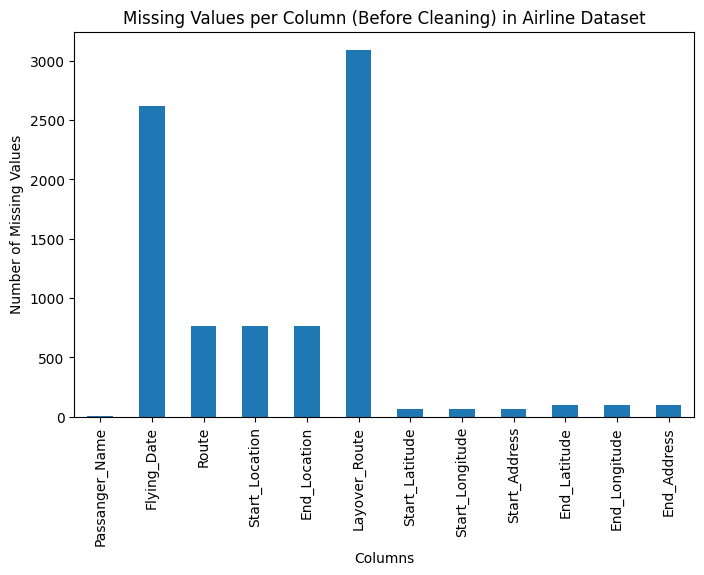

In [102]:
missing_values = df_a_old.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar')
plt.title("Missing Values per Column (Before Cleaning) in Airline Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


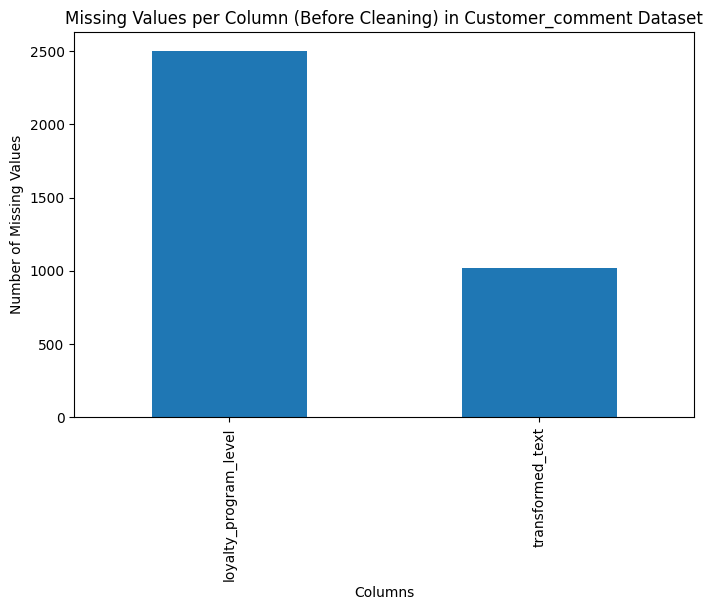

In [103]:
missing_values = df_c_old.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar')
plt.title("Missing Values per Column (Before Cleaning) in Customer_comment Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


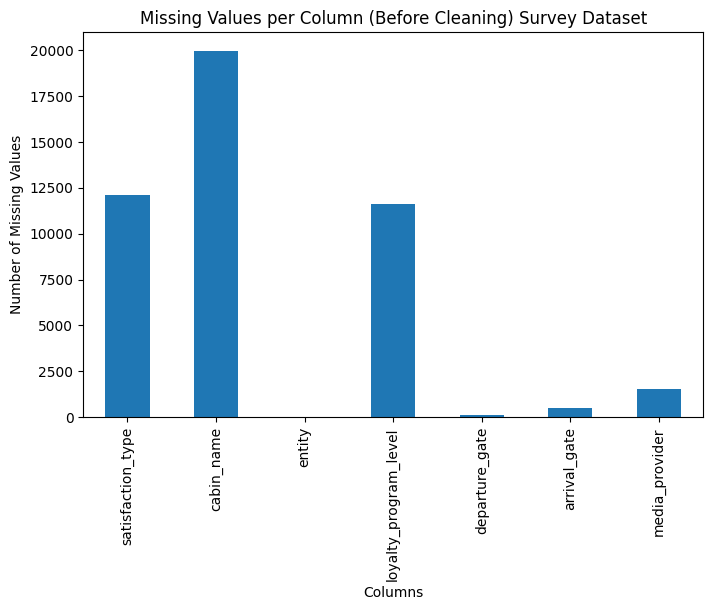

In [104]:
missing_values = df_s_old.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar')
plt.title("Missing Values per Column (Before Cleaning) Survey Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


In [105]:
summary = pd.DataFrame({
    "Before Cleaning": [df_a_old.shape[0], df_a_old.duplicated().sum(), df_a_old.isnull().sum().sum()],
    "After Cleaning": [df_a.shape[0], df_a.duplicated().sum(), df_a.isnull().sum().sum()]
}, index=["Rows", "Duplicates", "Missing Values"])

print("Airline Dataset Cleaning Summary:")
summary

Airline Dataset Cleaning Summary:


,Before Cleaning,After Cleaning
Rows,3575,3501
Duplicates,74,0
Missing Values,8487,0


In [106]:
summary = pd.DataFrame({
    "Before Cleaning": [df_c_old.shape[0], df_c_old.duplicated().sum(), df_c_old.isnull().sum().sum()],
    "After Cleaning": [df_c.shape[0], df_c.duplicated().sum(), df_c.isnull().sum().sum()]
}, index=["Rows", "Duplicates", "Missing Values"])

print("Customer_comment Dataset Cleaning Summary:")
summary

Customer_comment Dataset Cleaning Summary:


,Before Cleaning,After Cleaning
Rows,9424,9415
Duplicates,0,0
Missing Values,3523,0


In [107]:
summary = pd.DataFrame({
    "Before Cleaning": [df_p_old.shape[0], df_p_old.duplicated().sum(), df_p_old.isnull().sum().sum()],
    "After Cleaning": [df_p.shape[0], df_p.duplicated().sum(), df_p.isnull().sum().sum()]
}, index=["Rows", "Duplicates", "Missing Values"])

print("Passenger_booking Dataset Cleaning Summary:")
summary

Passenger_booking Dataset Cleaning Summary:


,Before Cleaning,After Cleaning
Rows,50002,49283
Duplicates,719,0
Missing Values,0,0


In [108]:
summary = pd.DataFrame({
    "Before Cleaning": [df_s_old.shape[0], df_s_old.duplicated().sum(), df_s_old.isnull().sum().sum()],
    "After Cleaning": [df_s.shape[0], df_s.duplicated().sum(), df_s.isnull().sum().sum()]
}, index=["Rows", "Duplicates", "Missing Values"])

print("Survey Dataset Cleaning Summary:")
summary

Survey Dataset Cleaning Summary:


,Before Cleaning,After Cleaning
Rows,47074,47026
Duplicates,0,0
Missing Values,45873,0


In [109]:

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return analyzer.polarity_scores(str(text))['compound']

df_a['Sentiment_Score'] = df_a['Review_content'].apply(get_sentiment)

def sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_a['Sentiment_Label'] = df_a['Sentiment_Score'].apply(sentiment_label)

In [110]:
top_routes = df_a[df_a['Route'] != 'Unknown']['Route'].value_counts().nlargest(10)

In [111]:
print("Top 10 Most Popular Flight Routes:")
print(top_routes)

Top 10 Most Popular Flight Routes:
Route
London to Johannesburg    16
London to Cape Town       15
Johannesburg to London    13
Vancouver to London       13
BKK to LHR                13
Cape Town to London       13
LHR to MIA                12
Hong Kong to London       11
London to Athens          11
London to Hong Kong       11
Name: count, dtype: int64


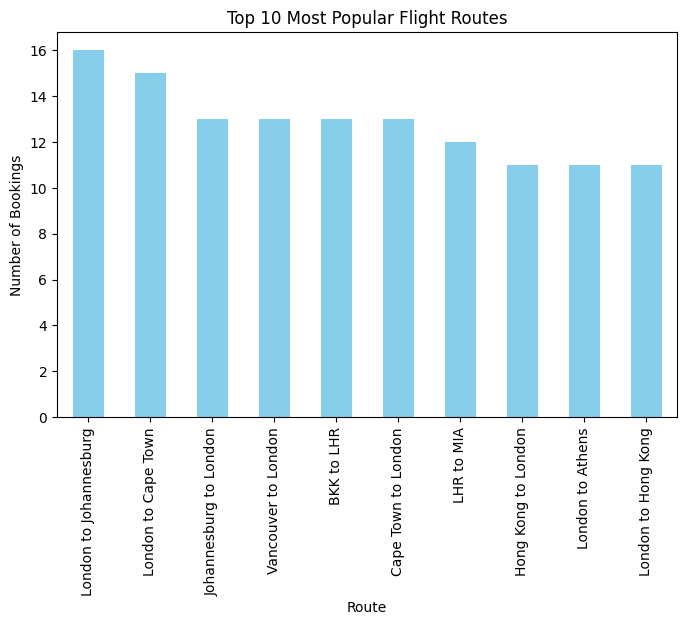

In [112]:
plt.figure(figsize=(8,5))
top_routes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Flight Routes')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.show()

This graph shows the 10 flight routes with the highest number of bookings, with each bar representing a route and its height corresponding to the total number of bookings on that route.


In [113]:
flight_hour_counts = df_p.groupby('flight_hour').size()

In [114]:
print("The Distribution of Bookings across Flight Hours:")
print(flight_hour_counts)

The Distribution of Bookings across Flight Hours:
flight_hour
0     1501
1     2071
2     2596
3     2616
4     2786
5     2817
6     3011
7     3080
8     3125
9     3098
10    3050
11    3071
12    3114
13    3046
14    2783
15    2201
16    1536
17     848
18     430
19     294
20     275
21     386
22     573
23     975
dtype: int64


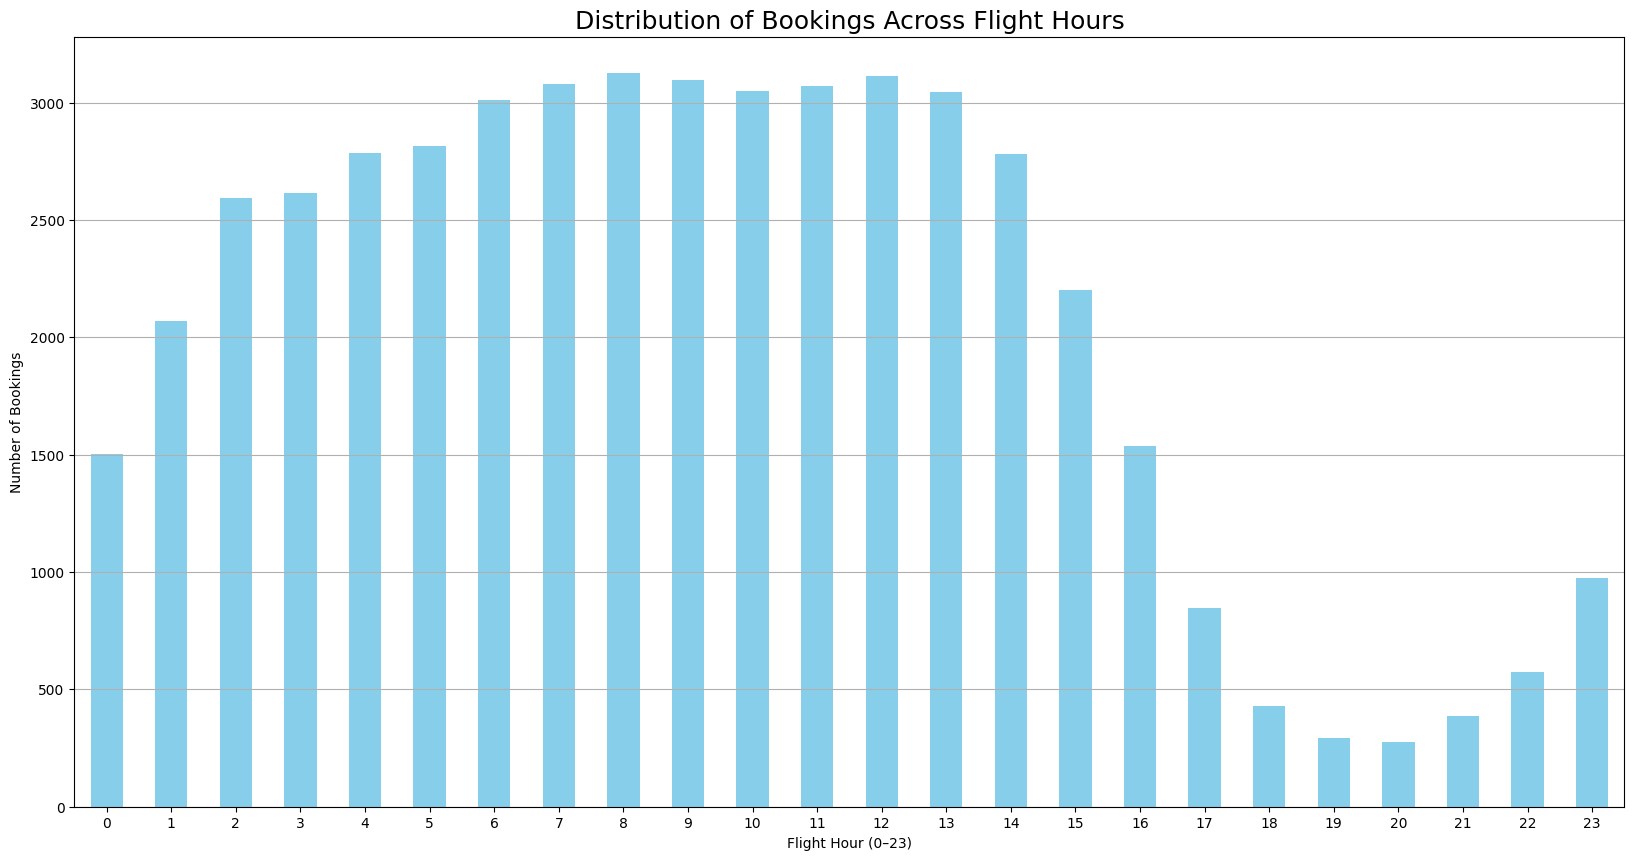

In [115]:
plt.figure(figsize=(20,10))
flight_hour_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Bookings Across Flight Hours', fontsize=18)
plt.xlabel('Flight Hour (0–23)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


This graph shows the distribution of bookings across different flight hours in a day, with each bar representing a specific hour (0–23) and its height showing how many bookings were made for flights departing at that hour.


In [116]:
print("Unique Traveler Types:")
print(df_a['Traveller_Type'].unique())

print("\nUnique Classes:")
print(df_a['Class'].unique())

Unique Traveler Types:
['Solo Leisure' 'Couple Leisure' 'Family Leisure' 'Business' 'Unknown'
 'Various']

Unique Classes:
[1 3 2 4 0]


In [117]:
rating_summary = df_a.groupby(['Traveller_Type', 'Class']).agg(
    avg_rating=('Rating', 'mean'),
    count=('Rating', 'size')
).reset_index()

rating_summary_sorted = rating_summary.sort_values(by='avg_rating', ascending=False)

In [118]:
top_10 = rating_summary_sorted.head(10)
bottom_10 = rating_summary_sorted.tail(10)

print("Top 10 Traveller Type & Class Combinations by Average Rating:")
print(top_10)
print("\nBottom 10 Traveller Type & Class Combinations by Average Rating:")
print(bottom_10)

Top 10 Traveller Type & Class Combinations by Average Rating:
    Traveller_Type  Class  avg_rating  count
21         Unknown      4    7.166667     48
16    Solo Leisure      4    6.627907     43
7   Couple Leisure      4    5.983607     61
19         Unknown      2    5.948052     77
20         Unknown      3    5.908046    261
18         Unknown      1    5.800664    301
15    Solo Leisure      3    5.780347    173
10  Family Leisure      3    5.743902     82
14    Solo Leisure      2    5.653061     98
6   Couple Leisure      3    5.324324    333

Bottom 10 Traveller Type & Class Combinations by Average Rating:
    Traveller_Type  Class  avg_rating  count
5   Couple Leisure      2    4.221053     95
8   Family Leisure      1    4.061069    262
17         Unknown      0    4.000000      1
4   Couple Leisure      1    3.908297    458
1         Business      2    3.750000     52
9   Family Leisure      2    3.600000     25
2         Business      3    3.510791    278
0         Busines

In [119]:
print("Average Rating by Traveller Type and Class:")
print(rating_summary_sorted)

Average Rating by Traveller Type and Class:
    Traveller_Type  Class  avg_rating  count
21         Unknown      4    7.166667     48
16    Solo Leisure      4    6.627907     43
7   Couple Leisure      4    5.983607     61
19         Unknown      2    5.948052     77
20         Unknown      3    5.908046    261
18         Unknown      1    5.800664    301
15    Solo Leisure      3    5.780347    173
10  Family Leisure      3    5.743902     82
14    Solo Leisure      2    5.653061     98
6   Couple Leisure      3    5.324324    333
13    Solo Leisure      1    4.631193    545
3         Business      4    4.270270     37
11  Family Leisure      4    4.230769     13
5   Couple Leisure      2    4.221053     95
8   Family Leisure      1    4.061069    262
17         Unknown      0    4.000000      1
4   Couple Leisure      1    3.908297    458
1         Business      2    3.750000     52
9   Family Leisure      2    3.600000     25
2         Business      3    3.510791    278
0         B

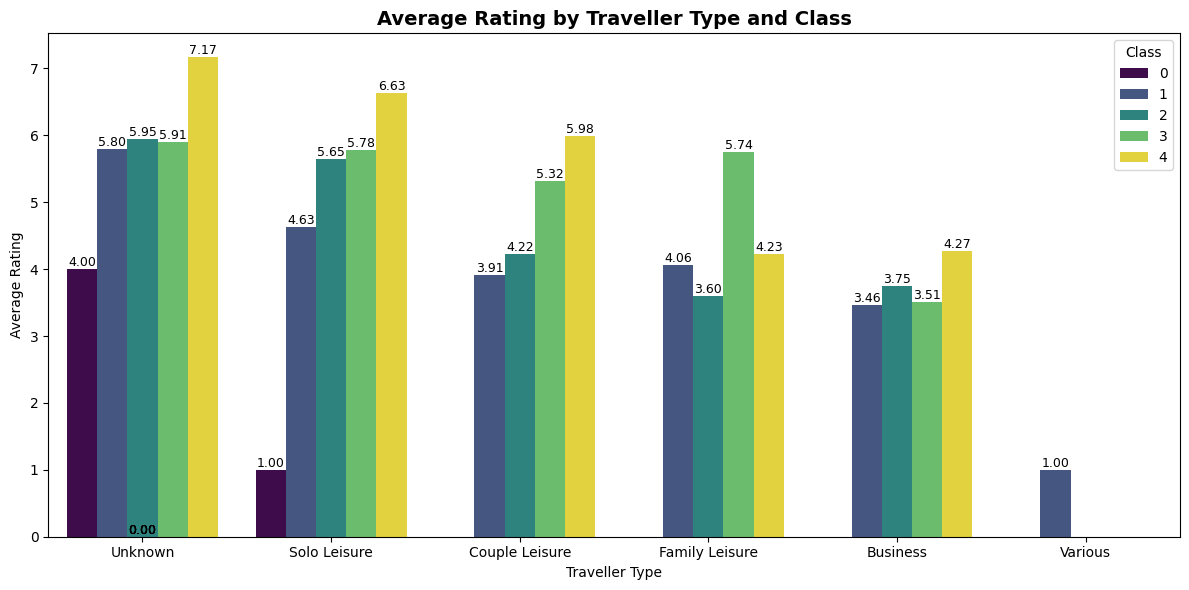

In [120]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=rating_summary_sorted,
    x='Traveller_Type',
    y='avg_rating',
    hue='Class',
    palette='viridis'
)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=9)

plt.title('Average Rating by Traveller Type and Class', fontsize=14, weight='bold')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

This graph visualizes the average ratings for each traveler type across different flight classes, showing how satisfaction varies by both the type of traveler and the class they flew in. Each bar represents the mean rating for a combination of traveler type and class, with the numbers on top indicating the precise average rating.

Feature Encoding

In [121]:
traveller_one_hot = pd.get_dummies(df_a['Traveller_Type'], prefix='Traveller')
df_a = pd.concat([df_a, traveller_one_hot], axis=1)
df_a = df_a.drop('Traveller_Type', axis=1)

In [122]:
df_a['Rating'] = (df_a['Rating'] >=5).astype(int)

In [123]:
le = LabelEncoder()

unique_locations = pd.concat([df_a['Start_Location'].astype(str),df_a['End_Location'].astype(str)]).unique()

le.fit(unique_locations)

for col in ['Start_Location', 'End_Location']:
    if col in df_a.columns:
        df_a[f'{col}_Encoded'] = le.transform(df_a[col].astype(str))

Assigning features

In [124]:
X = df_a[['Verified', 'Class', 'Sentiment_Score'] + [col for col in df_a.columns if col.startswith('Traveller_')] + ['Start_Location_Encoded', 'End_Location_Encoded']]
y = df_a['Rating']

In [125]:
X2 = df_a[['Verified', 'Class', 'Sentiment_Score']]

X3 = df_a[['Verified', 'Class', 'Sentiment_Score'] + ['Start_Location_Encoded', 'End_Location_Encoded']]


In [126]:
print(df_a)

         Passanger_Name  Flying_Date                  Route  Rating  Verified  \
0            Paige Boet    June 2023  New Orleans to London       0         1   
1               S Layne   March 2023        London to Amman       0         1   
2           E Lanewoski  August 2015     Heathrow to Bodrum       0         1   
3           Joel Burman    June 2023        Amman to London       0         0   
4               R Vines  August 2015   London City to Ibiza       1         1   
...                 ...          ...                    ...     ...       ...   
3570           W Benson  August 2015                Unknown       0         0   
3571           S Luqman  August 2015                Unknown       0         0   
3572            D Smith  August 2015                Unknown       0         0   
3573           W Benson  August 2015                Unknown       1         0   
3574  Michael Dielissen  August 2015                Unknown       1         0   

                           

In [127]:
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y.head())
print("X and y dimensions:",X,y.shape)

Features (X):
      Verified  Class  Sentiment_Score  Traveller_Business  \
0            1      1          -0.7990               False   
1            1      3           0.7184               False   
2            1      3          -0.7096               False   
3            0      1          -0.5849               False   
4            1      3           0.9657               False   
...        ...    ...              ...                 ...   
3570         0      1           0.9129               False   
3571         0      1          -0.8763               False   
3572         0      1          -0.2003               False   
3573         0      3           0.9864               False   
3574         0      2           0.3423               False   

      Traveller_Couple Leisure  Traveller_Family Leisure  \
0                        False                     False   
1                         True                     False   
2                        False                     False   
3

Correlation map to find Features for training

Features used for correlation: Index(['Rating', 'Verified', 'Class', 'Sentiment_Score', 'Start_Latitude',
       'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Start_Location_Encoded', 'End_Location_Encoded',
       'Layover_Route_Encoded', 'Route_Encoded', 'Traveller_Business',
       'Traveller_Couple Leisure', 'Traveller_Family Leisure',
       'Traveller_Solo Leisure', 'Traveller_Unknown', 'Traveller_Various'],
      dtype='object')
NaNs in correlation features:
 Rating                      0
Verified                    0
Class                       0
Sentiment_Score             0
Start_Latitude              0
Start_Longitude             0
End_Latitude                0
End_Longitude               0
Start_Location_Encoded      0
End_Location_Encoded        0
Layover_Route_Encoded       0
Route_Encoded               0
Traveller_Business          0
Traveller_Couple Leisure    0
Traveller_Family Leisure    0
Traveller_Solo Leisure      0
Traveller_Unknown           0
Trave

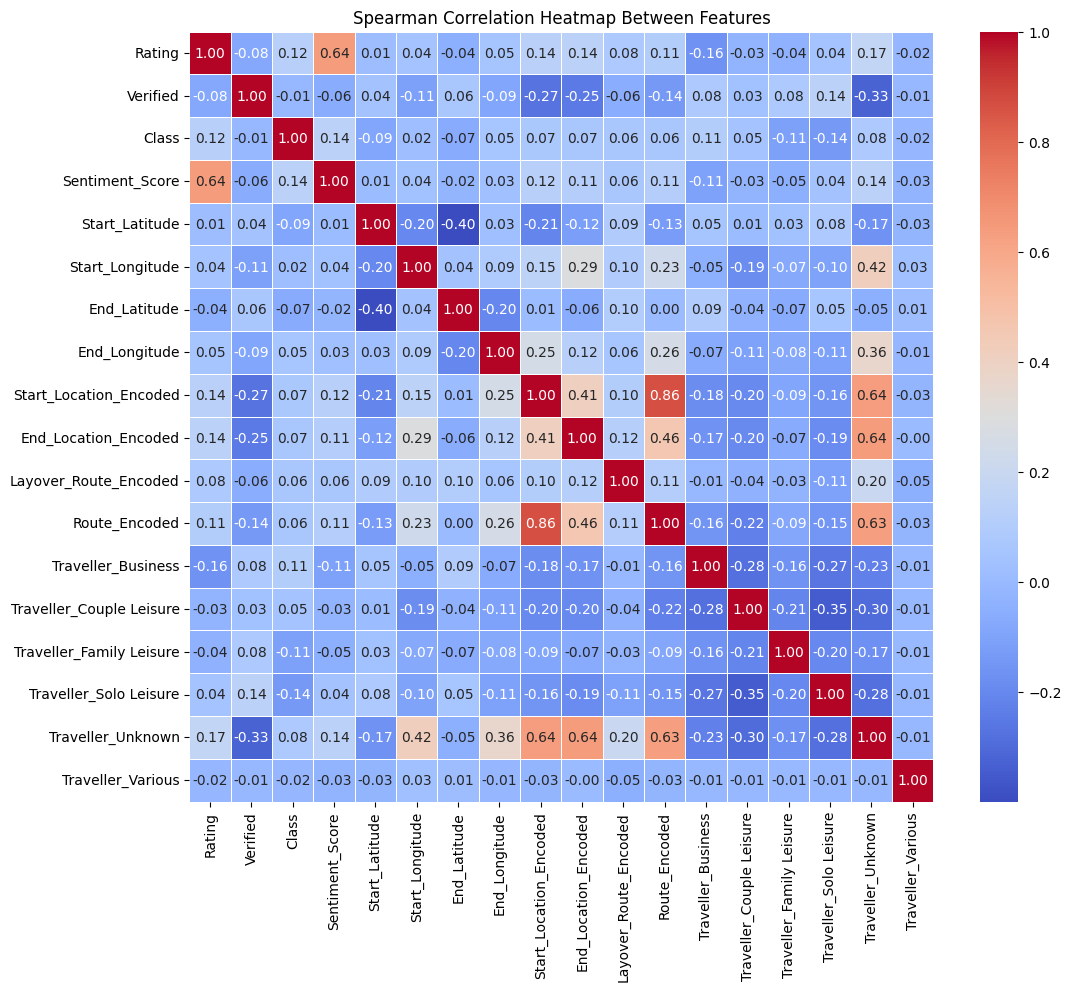

In [128]:
le = LabelEncoder()
for col in ['Start_Location', 'End_Location', 'Layover_Route', 'Route']:
    if col in df_a.columns:
        df_a[f'{col}_Encoded'] = le.fit_transform(df_a[col].astype(str).fillna('Unknown'))

# Select numerical features for correlation
corr_features = df_a[['Rating', 'Verified', 'Class', 'Sentiment_Score',
                      'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
                      'Start_Location_Encoded', 'End_Location_Encoded', 'Layover_Route_Encoded', 'Route_Encoded'] +
                     [col for col in df_a.columns if col.startswith('Traveller_')]]
print("Features used for correlation:", corr_features.columns)
print("NaNs in correlation features:\n", corr_features.isna().sum())

# Compute Spearman's correlation with Rating
corr_matrix = corr_features.corr(method='spearman')
rating_correlations = corr_matrix['Rating'].sort_values(ascending=False)
print("\nCorrelations with Rating:")
print(rating_correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap Between Features')
plt.show()

Feature Scaling

In [129]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print first 5 rows of scaled features
print("Scaled Features (first 5 rows):")
print(X_scaled[:5])

print("Shape of 1 row:")
print(X_scaled[0].shape)

Scaled Features (first 5 rows):
[[ 1.51035166 -0.88560413 -1.25542115 -0.46526312 -0.60892604 -0.3499645
   1.75240698 -0.49454903 -0.01690309  0.21164011 -0.3288669 ]
 [ 1.51035166  1.0491853   0.70061143 -0.46526312  1.64223558 -0.3499645
  -0.5706437  -0.49454903 -0.01690309 -0.38945023 -1.95376672]
 [ 1.51035166  1.0491853  -1.14017842 -0.46526312 -0.60892604 -0.3499645
   1.75240698 -0.49454903 -0.01690309 -0.33334846 -1.58171022]
 [-0.66209746 -0.88560413 -0.97943158 -0.46526312 -0.60892604 -0.3499645
   1.75240698 -0.49454903 -0.01690309 -2.10456133 -0.3288669 ]
 [ 1.51035166  1.0491853   1.01939808 -0.46526312 -0.60892604  2.85743267
  -0.5706437  -0.49454903 -0.01690309 -0.36540661 -0.71610938]]
Shape of 1 row:
(11,)


Splitting the Dataset

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [131]:
print("Train data shape:",X_train.shape, "Train Label shape", y_train.shape)
print("Test data shape:",X_test.shape, "Test Label shape", y_test.shape)

Train data shape: (2800, 11) Train Label shape (2800,)
Test data shape: (701, 11) Test Label shape (701,)


Building the Shallow Feedforward Neural Network model

In [132]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
    ])

In [133]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

Compiling the model

In [134]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

Training the model

In [135]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5385 - loss: 0.7775 - precision: 0.5090 - recall: 0.9428 - val_accuracy: 0.7196 - val_loss: 0.6322 - val_precision: 0.6622 - val_recall: 0.8845
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7417 - loss: 0.6081 - precision: 0.6916 - recall: 0.8695 - val_accuracy: 0.7857 - val_loss: 0.5471 - val_precision: 0.7386 - val_recall: 0.8773
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7786 - loss: 0.5504 - precision: 0.7479 - recall: 0.8529 - val_accuracy: 0.8071 - val_loss: 0.4916 - val_precision: 0.7649 - val_recall: 0.8809
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7894 - loss: 0.5022 - precision: 0.7426 - recall: 0.8456 - val_accuracy: 0.8107 - val_loss: 0.4654 - val_precision: 0.7647 - val_recall: 0.8917
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8025 - loss: 0.4724 - precision: 0.7739 - recall: 0.8402 - val_accuracy: 0.8179 - val_loss: 0.4476 - va

Model Training Visualization

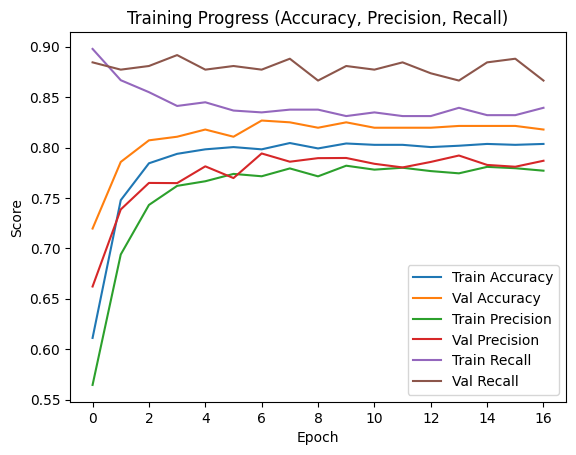

In [136]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')

plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Training Progress (Accuracy, Precision, Recall)')
plt.legend()
plt.show()

In [137]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Model Evaluation

In [138]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

print("\n=== Model Evaluation on Test Set ===")
print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall:    {test_recall:.4f}")
print(f"Test F1-Score:  {f1:.4f}")


=== Model Evaluation on Test Set ===
Test Loss:      0.4714
Test Accuracy:  0.7903
Test Precision: 0.7131
Test Recall:    0.8451
Test F1-Score:  0.7735


Added Explainable AI Techniques to interpret predictions

SHAP Global Explainer

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)

SHAP Local Explainer
Row 0

Paige Boet |Jun-23	|New Orleans to London	|1	|Trip Verified	|Solo Leisure	|Economy Class	|New Orleans	|London

Ground Truth: 0, Bad Rating

In [ ]:
explainer = shap.Explainer(model, X_train)

i = 0
X_instance = X_test.iloc[i:i+1] if hasattr(X_test, "iloc") else X_test[i:i+1]

shap_values = explainer(X_instance)

shap.initjs()

shap.force_plot(
    shap_values.base_values[0],
    shap_values.values[0],
    X_instance,
    feature_names=X.columns
)


LIME Local Explainer

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=X.columns,
    class_names=['Bad Rating', 'Good Rating'],
    discretize_continuous=True
)

Initiated for Row 2

E Lanewoski		|Heathrow to Bodrum	|2	|Trip Verified	|Solo Leisure	|Business Class	|London Heathrow	|Bodrum

Ground Truth: 0, Bad Rating

In [ ]:
i = 0
exp = explainer_lime.explain_instance(
    X_test[i],
    lambda x: np.hstack([1 - model.predict(x, verbose=0), model.predict(x, verbose=0)]),
    num_features=6
)
exp.show_in_notebook()

Inference Function

In [ ]:
def predict_rating(input_data, model, scaler, le):

    # Convert input to DataFrame
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.Series):
        input_df = input_data.to_frame().T
    else:
        input_df = input_data

    # Handle Traveller columns
    expected_traveller_cols = [col for col in X.columns if col.startswith('Traveller_')]
    if 'Traveller_Type' in input_df.columns:
        traveller_one_hot = pd.get_dummies(input_df['Traveller_Type'], prefix='Traveller')
        input_df = pd.concat([input_df, traveller_one_hot], axis=1)
        input_df = input_df.drop('Traveller_Type', axis=1)

    # Ensure all expected Traveller columns exist
    for col in expected_traveller_cols:
        if col not in input_df.columns:
            input_df[col] = 0

    # Encode Start_Location and End_Location
    for col in ['Start_Location', 'End_Location']:
        if col in input_df.columns:
            input_df[f'{col}_Encoded'] = input_df[col].astype(str).fillna('Unknown').map(
                lambda x: le.transform([x])[0] if x in le.classes_ else le.transform(['Unknown'])[0]
            )

    # Select features in correct order
    features = ['Verified', 'Class', 'Sentiment_Score'] + expected_traveller_cols + ['Start_Location_Encoded', 'End_Location_Encoded']
    input_features = input_df[features]

    # Scale features
    input_scaled = scaler.transform(input_features)

    # Predict
    prob = model.predict(input_scaled, verbose=0)[0][0]
    rating = 1 if prob >= 0.5 else 0

    return {'rating': rating}


Prediction for Row 4

R Vines		|London City to Ibiza	|7	|Trip Verified	|Family Leisure	|Business Class	|London City	|Ibiza

Ground Truth: 1, Good Rating

In [ ]:
i =4
result = predict_rating(df_a.loc[i], model, scaler, le)
print(result)
